In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("bright")

In [21]:
CALIBRATION_FILE = '../calibration/out/C.mat'
MEASUREMENT_ROOT = './measurement_files/'
MEASUREMENT = "validation_2"
NANO_FILE = MEASUREMENT_ROOT + MEASUREMENT + ".csv"
TELEMETRY_FILE = MEASUREMENT_ROOT + MEASUREMENT + "_telemetry.txt"

In [22]:
nano_df = calibration.nanofile_to_dataframe(NANO_FILE)
telem_df = calibration.telemetry_to_dataframe(TELEMETRY_FILE)
C = scipy.io.loadmat(CALIBRATION_FILE)['C']
print nano_df.shape
print telem_df.shape
print C.shape

(372000, 7)
(20396, 9)
(24, 6)


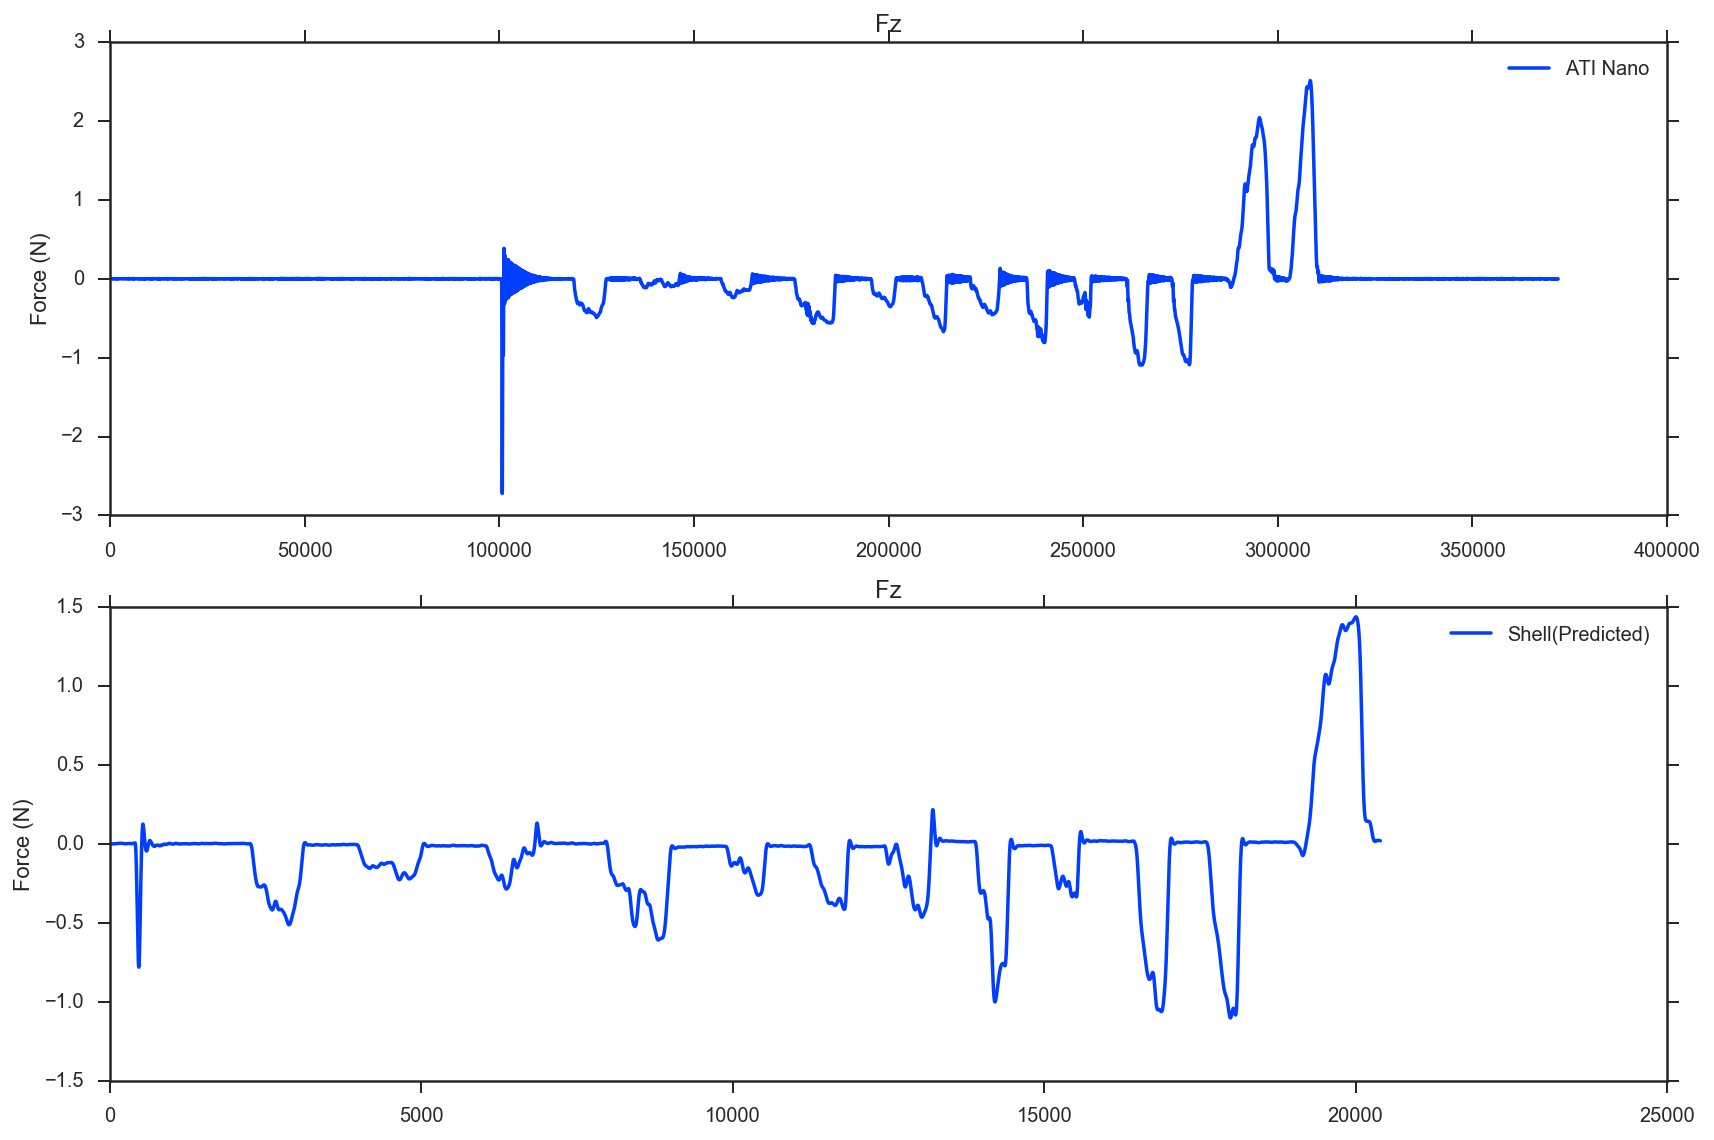

In [23]:
fig, ax = plt.subplots(2)
ax[0].plot(nano_df["Fz"], label="ATI Nano")
ax[0].set_title("Fz")
ax[0].set_ylabel("Force (N)")
ax[0].legend(loc='upper right')

ax[1].plot(utils.add_forces_moments(telem_df, C)["Fz"], label="Shell(Predicted)")
ax[1].set_ylabel("Force (N)")
ax[1].set_title("Fz")
ax[1].legend(loc='upper right')

fig.set_size_inches(12, 8)
plt.tight_layout()

plt.show()

In [8]:
FLICK_NANO_INDEX = nano_df["Fz"][:150000].apply(abs).argmax(axis=0)
FLICK_TELEM_INDEX = utils.add_forces_moments(telem_df, C)['Fz'][:5000].apply(abs).argmax(axis=0) # the flick index
print FLICK_NANO_INDEX
print FLICK_TELEM_INDEX

100785
464


In [9]:
M, S = calibration.align_two_streams(nano_df, telem_df, 10, 1, FLICK_NANO_INDEX, FLICK_TELEM_INDEX)
print M.shape
print S.shape

(19932, 6)
(19932, 8)


In [10]:
# C = calibration.least_squares_fit(M,S)

In [11]:
S_df = pd.DataFrame(S, columns=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])
shell_sensor_df = utils.add_forces_moments(S_df, C)
nano_sensor_df = pd.DataFrame(M, columns=["Fx", "Fy", "Fz", "Mx", "My", "Mz"])

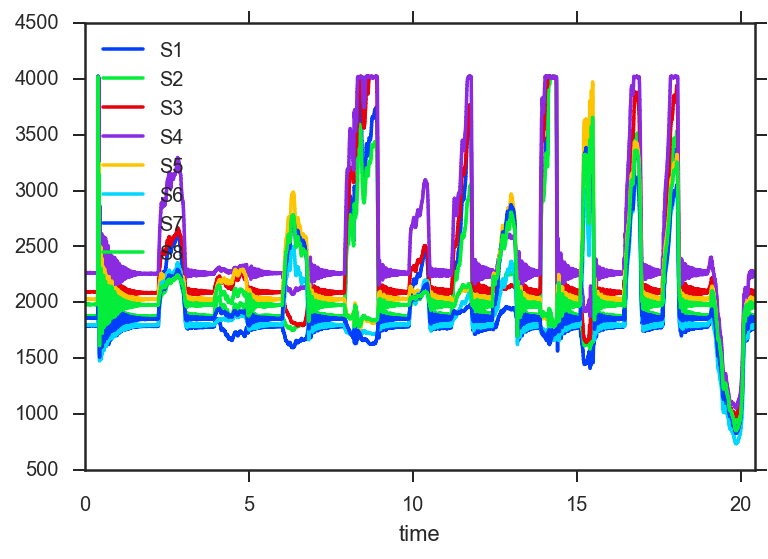

In [24]:
df = utils.process_data_files(TELEMETRY_FILE, CALIBRATION_FILE)
df.plot(x="time", y=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])

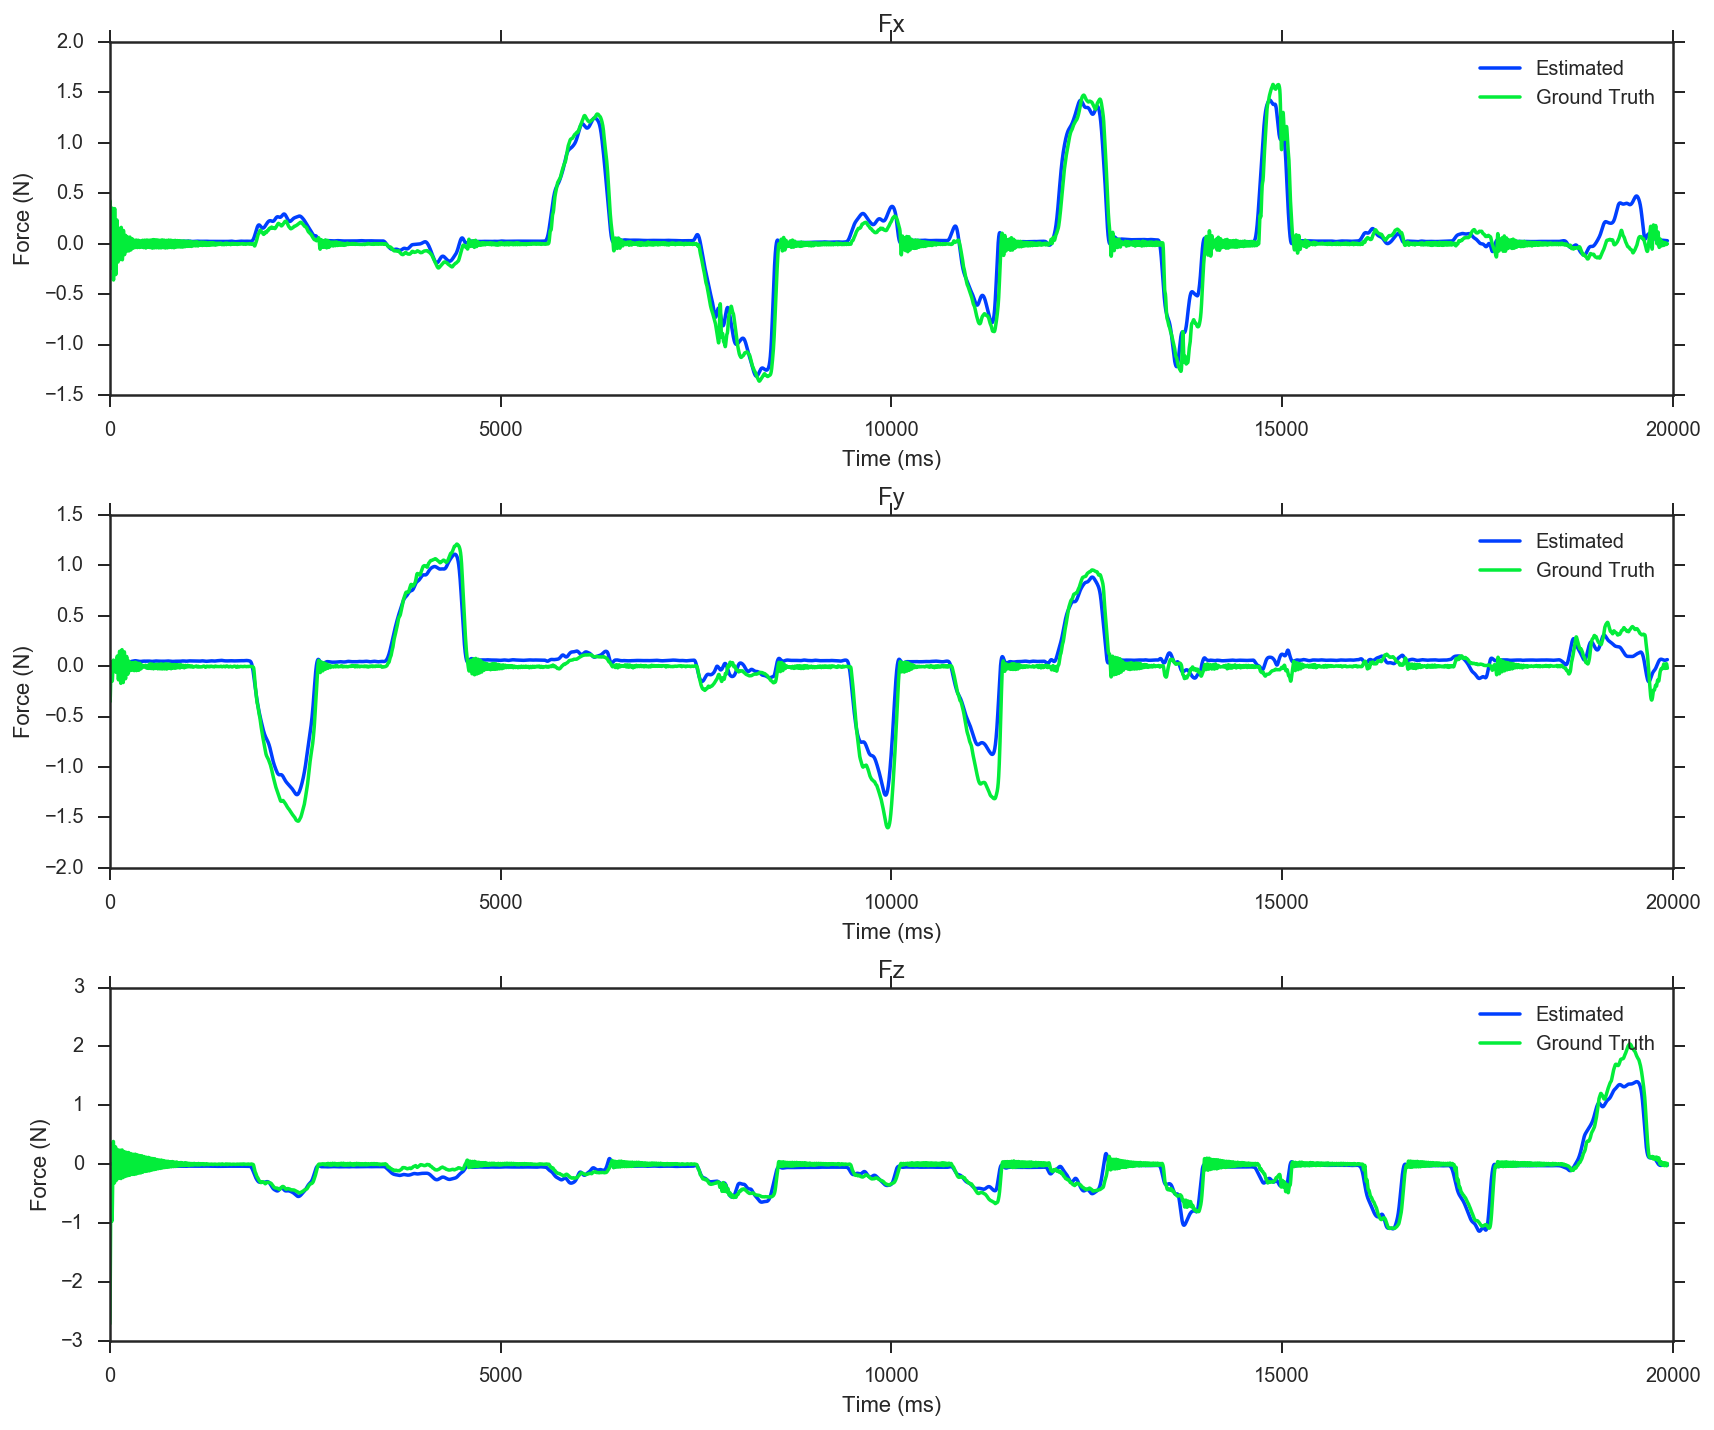

Saving image as out/force_error_plots.png
Image saved.


In [25]:
calibration.plot_force_error(shell_sensor_df, nano_sensor_df, save_figure=True)

In [26]:
loss = calibration.calculate_mse_error(shell_sensor_df, nano_sensor_df, columns=['Fx', 'Fy', 'Fz'])
print loss

Fx    0.014230
Fy    0.015100
Fz    0.016736
dtype: float64


In [27]:
# Median Percentage Error
columns = ['Fx', 'Fy', 'Fz']
diffX = (shell_sensor_df[columns[0]][5000:] - nano_sensor_df[columns[0]][5000:])
diffY = (shell_sensor_df[columns[1]][5000:] - nano_sensor_df[columns[1]][5000:])
diffZ = (shell_sensor_df[columns[2]][5000:] - nano_sensor_df[columns[2]][5000:])

print diffX.argmax()
print diffY.argmax()
print diffZ.argmax()

8503
11376
17676


In [28]:
print shell_sensor_df.shape
print nano_sensor_df.shape

(19932, 16)
(19932, 6)


In [138]:
def generate_estimate_vs_truth_plot(force):
    xfont={'fontname':'Times New Roman'}
    font_size = 40
    label_size = 32
    plt.figure(figsize=(9,4))
    ax = plt.axes()
    plt.scatter(shell_sensor_df[force], nano_sensor_df[force], c=".3")
    plt.plot([-2, 2], [-2, 2], ls='--', c='.3')
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    
    ax.set_ylabel(force + " estimated (N)", fontdict=xfont, fontsize=font_size)
    ax.set_xlabel(force + " ground truth (N)",fontdict=xfont, fontsize=font_size)
    ax.tick_params(axis='both', which='major', labelsize=label_size)


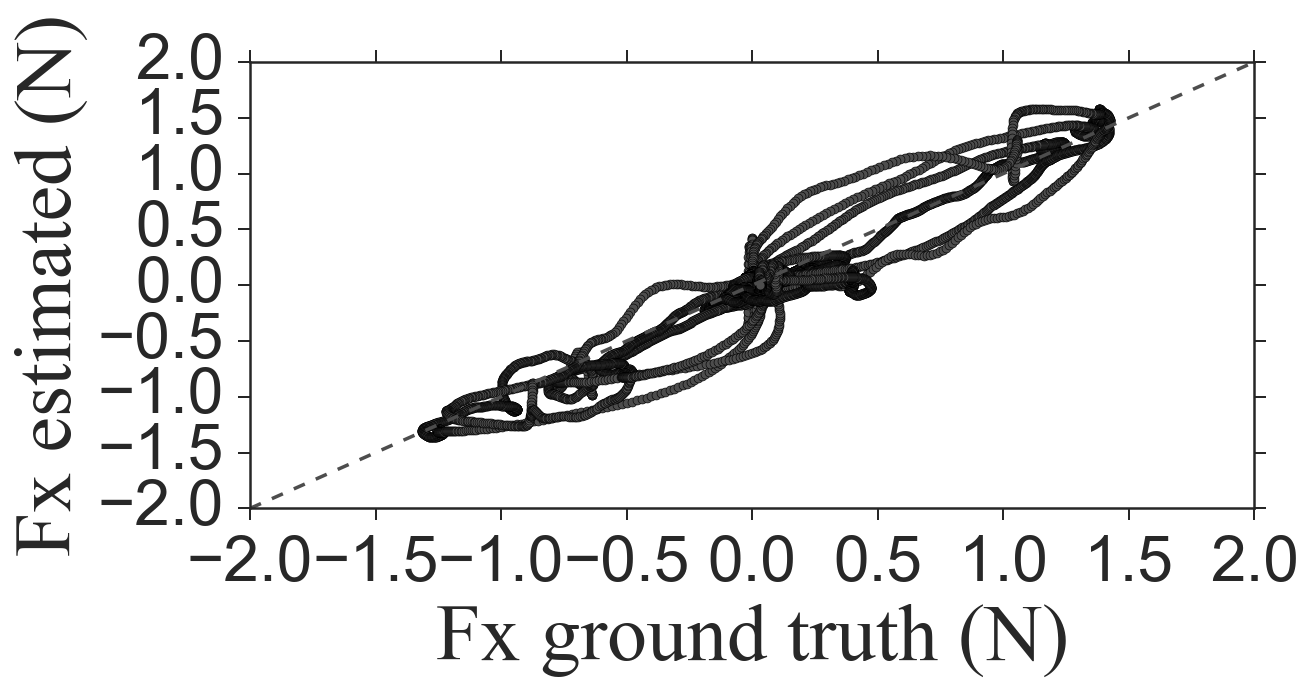

In [139]:
generate_estimate_vs_truth_plot('Fx')

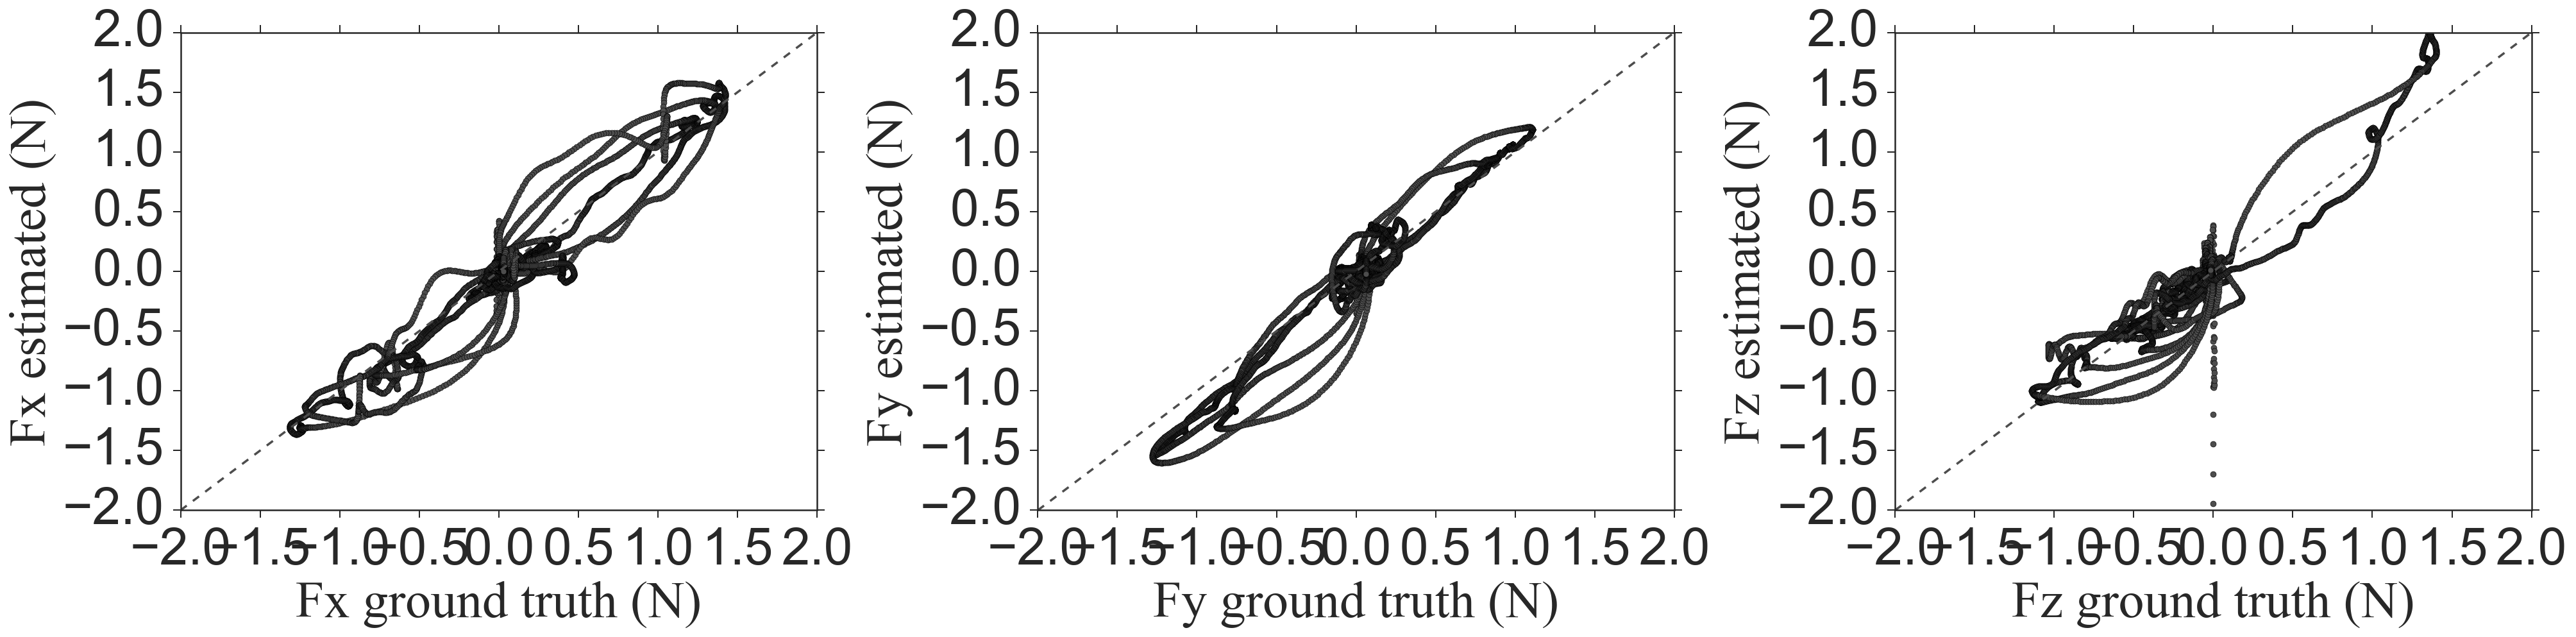

In [89]:
# fig, axarr = plt.subplots(3)
xfont={'fontname':'Times New Roman'}
font_size = 40
label_size = 40
plt.figure(figsize=(28,7), tight_layout=True)
# ax = plt.axes()
# 1st Plot
plt.subplot(131)
plt.scatter(shell_sensor_df['Fx'], nano_sensor_df['Fx'], c=".3")
plt.plot([-2, 2], [-2, 2], ls='--', c='.3')
# plt.set(xlim=(-2,2), ylim=(-2,2))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.ylabel("Fx estimated (N)", fontdict=xfont, fontsize=font_size)
plt.xlabel("Fx ground truth (N)",fontdict=xfont, fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)

# 2nd Plot
plt.subplot(132)
plt.scatter(shell_sensor_df['Fy'], nano_sensor_df['Fy'], c=".3")
plt.plot([-2, 2], [-2, 2], ls='--', c='.3')
# plt.set(xlim=(-2,2), ylim=(-2,2))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.ylabel("Fy estimated (N)",fontdict=xfont, fontsize=font_size)
plt.xlabel("Fy ground truth (N)",fontdict=xfont, fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)

# 3rd Plot
plt.subplot(133)
plt.scatter(shell_sensor_df['Fz'], nano_sensor_df['Fz'], c=".3")
plt.plot([-2, 2], [-2, 2], ls='--', c='.3')
# plt.set(xlim=(-2,2), ylim=(-2,2))
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.ylabel("Fz estimated (N)",fontdict=xfont, fontsize=font_size)
plt.xlabel("Fz ground truth (N)",fontdict=xfont, fontsize=font_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)

plt.show()